In [29]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt
from scipy import signal
from scipy.integrate import quad

In [30]:
start = 0
finish = 5
step = 0.01

# ЗАДАНИЕ 1

![Alt text](image.png)

In [31]:
def b_n(myFunction, n, w, t0, T):
    integral = lambda t: myFunction(t) * np.sin(n * w * t)
    res = quad(integral, t0, t0 + T)[0]
    return 2/T * res 

def a_n(myFunction, n, w, t0, T):
    integral = lambda t: myFunction(t) * np.cos(n * w * t)
    res = quad(integral, t0, t0 + T)[0]
    return 2/T * res 

def calculate_furie(t, myFunction, w, w2, T, t0, N):
    a0 = a_n(myFunction, 0, w, t0, T)
    An = np.array([a_n(myFunction, n, w, t0, T) * np.cos(n * w * t) for n in range(1, N)])
    Bn = np.array([b_n(myFunction, n, w2, t0, T) * np.sin(n * w2 * t) for n in range(1, N)])
    sigma = An.sum() + Bn.sum()
    return a0/2 + sigma

def DFT_slow(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

![Alt text](image-1.png)

C:\Users\emelianov_aa\AppData\Local\Temp\ipykernel_17488\1611033537.py:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  res = quad(integral, t0, t0 + T)[0]


смотрим диаграмму новой функции Аcos


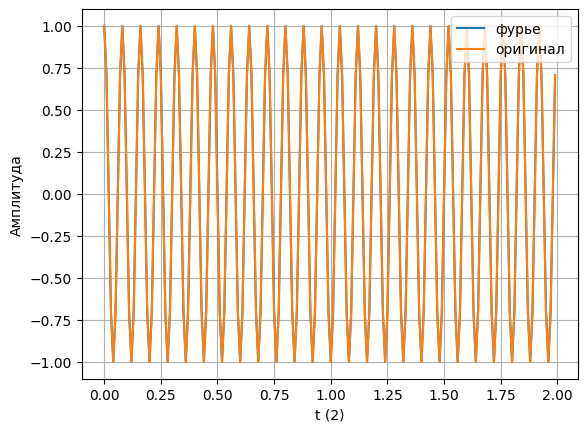

In [35]:
def x(w):
    return lambda t: np.cos(t * w)

start = 0
finish = 2
step = 0.01
T = 2
N = 10
w = 2 * np.pi / T
t0 = 0

w = 50 * np.pi / T
w2 = 150 * np.pi / T

main_function = x(w)

list_point = []
time_series = np.arange(start, finish, step)
for t in time_series:
    list_point.append(calculate_furie(t, main_function, w, w2, T, 0, 10))

origin_signal = np.array([main_function(t) for t in time_series])

print("смотрим диаграмму новой функции Аcos")
plt.plot(time_series, list_point, label='фурье')
plt.plot(time_series, origin_signal, label='оригинал')
plt.xlabel('t (2)')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()

смотрим спектры моего преобразования фурье и в библиотеке fft


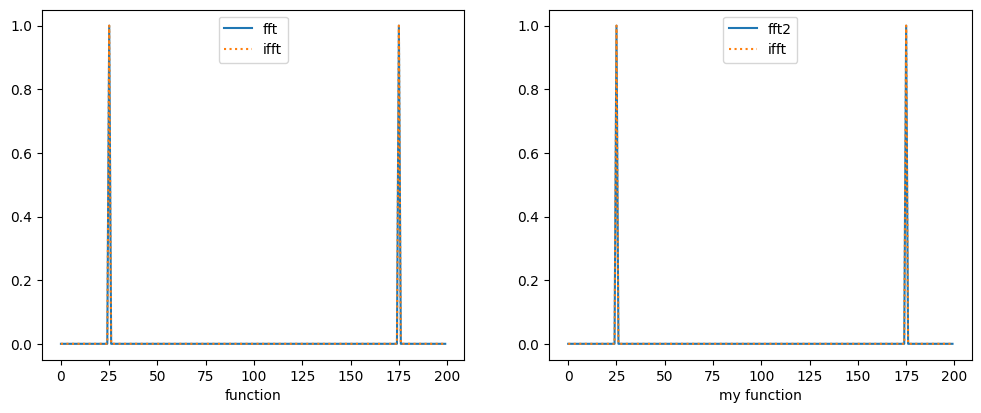

In [42]:
print("смотрим спектры моего преобразования фурье и в библиотеке fft")

fig = plt.figure(figsize=(12, 10))

plt.subplots_adjust(wspace=0.2, hspace=0.2)

spectr = np.fft.fft(origin_signal)
spectr_i = np.fft.ifft(origin_signal)
plt.subplot(221)
plt.plot(spectr/np.max(spectr), label='fft')
plt.plot(spectr_i/np.max(spectr_i), label='ifft',  linestyle='dotted')
plt.xlabel('function')
plt.legend()

spectr2 = DFT_slow(origin_signal)
plt.subplot(222)
plt.plot(spectr2/np.max(spectr2), label='fft2')
plt.plot(spectr_i/np.max(spectr_i), label='ifft',  linestyle='dotted')
plt.xlabel('my function')
plt.legend()
plt.show()